# Исследование частотного словаря русского языка. Часть 2
Это исследование проведено в процессе освоения специальности Data Analyst на [Dataquest](https://www.dataquest.io/path/data-analyst). Его цель - попрактиковаться в работе с Pandas, Matplotlib (и немного Numpy), а заодно узнать что-нибудь интересное про русский язык.
## Об источнике данных
В этой работе в качестве источника использован [Частотный словарь русского языка](http://dict.ruslang.ru/freq.php) (далее для краткости "частотный словарь"), созданный О.Н. Ляшевской и С.А. Шаровым на основе [Национального корпуса русского языка](http://www.ruscorpora.ru/en/index.html) (далее "корпус"). 

Итак, прочитаем данные из CSV-файла, доступного для загрузки на сайте частотного словаря.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('freq.txt', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52138 entries, 0 to 52137
Data columns (total 6 columns):
Lemma        52138 non-null object
PoS          52138 non-null object
Freq(ipm)    52138 non-null float64
R            52138 non-null int64
D            52138 non-null int64
Doc          52138 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.4+ MB


Столбцы полученной таблицы:
- *Lemma* - исходная форма слова, обобщающая все найденные в текстах корпуса словоформы. Так, например, если в текстах корпуса встречаются слова "большой", "большая", "больших", то все они подсчитаны и "записаны" как единицы употребления слова "большой", а по отдельности в частотном словаре не встречаются.
- *PoS* - часть речи, соответствующая лемме. Описания частей речи и их условные обозначения в частотном словаре можно найте в документе ["Введение к частотному словарю современного русского языка"](http://dict.ruslang.ru/freq.pdf) (далее для краткости "Введение") на странице 11. 
- *Freq(ipm)* - количество употреблений слова на миллион слов корпуса, или ipm (instances per million words).
- *R* - range, показатель того, насколько общеупотребительным или, наоборот, специфичным является слово в плане литературного жанра. Чем ниже значение, тем более специфично слово. Например, слово "корреляция" (R = 36) более специфичное, характерно для научной и учебной литературы (см. в [корпусе](http://search1.ruscorpora.ru/stat.xml?env=alpha&mycorp=&mysent=&mysize=&mysentsize=&mydocsize=&dpp=&spp=&spd=&text=lexform&mode=main&sort=gr_tagging&lang=ru&nodia=1&req=%EA%EE%F0%F0%E5%EB%FF%F6%E8%FF&p=1)), а слово "корректный" (R = 94) более общеупотребительное. Показатель R рассчитан на основе количества сегментов корпуса, в которых встретилось слово.
- *D* - коэффициент Жуайана. По смыслу то же, что R, но посчитан по более сложной формуле, и оценивается авторами как более надежный.
- *Doc* - количество документов корпуса, в которых слово встретилось хотя бы раз.

Подробнее про показатели можно прочитать во "Введении", раздел 4 на стр. 5

Далее для целей исследования мне будет удобно, чтобы таблица была упорядочена по частоте в порядке убывания. Кроме того, я переиндексирую таблицу для удобства восприятия порядка элементов.

In [3]:
fr = df.sort_values('Freq(ipm)',ascending=False).reset_index(drop=True)
fr.head(5)

,Lemma,PoS,Freq(ipm),R,D,Doc
0,и,conj,35801.8,100,99,37704
1,в,pr,31374.2,100,98,37865
2,не,part,18028.0,100,97,33999
3,на,pr,15867.3,100,98,36748
4,я,spro,12684.4,100,95,17116


In [4]:
fr.tail(5)

,Lemma,PoS,Freq(ipm),R,D,Doc
52133,плодотворность,s,0.4,20,77,25
52134,самоуправляемый,a,0.4,21,75,31
52135,хиромант,s,0.4,19,67,21
52136,хиромантия,s,0.4,22,77,25
52137,загород,s,0.4,19,71,23


## Доверяй, но проверяй
Несмотря на чрезвычайную надежность источника я все же проверю кое-какие из приведенных там цифр. В частности, информацию о том, какой процент текста покрывают наиболее частотные леммы. Цитирую:
"Десять самых частотных лемм покрывают 16.5% текста,  100 лемм – 37%, 1 000 лемм – 60%, 2 000 лемм – 69%, 10 000 – 85% всех текстов" (см. "Введение", стр.5).

In [30]:
split_last_el = [10,100,1000,2000,10000]
for i in range(5):
    result = np.sum(fr['Freq(ipm)'].iloc[0:split_last_el[i]])/10000
    print('Первые ' + str(split_last_el[i]) +' слов: ' + str(int(result)) + '%')

Первые 10 слов: 16%
Первые 100 слов: 37%
Первые 1000 слов: 61%
Первые 2000 слов: 69%
Первые 10000 слов: 86%


Итак, в целом результаты совпадают. Есть расхождения в 1% (для 1000 и 10000 слов) и, честно говоря, не представляю, каковы причины этих расхождений. Возможно, дело в методике подсчета.

## Масштабы бедствия
После формальной проверки можно заняться делом. Посмотрим для начала на распределение частот слов в частотном словаре, построив для этого гистограмму.

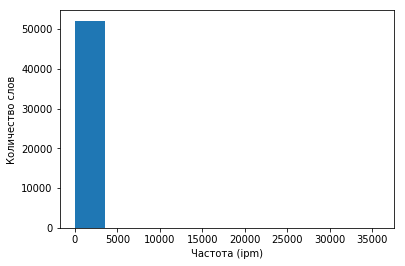

In [6]:
plt.hist(fr['Freq(ipm)'])
plt.xlabel('Частота (ipm)')
plt.ylabel('Количество слов')
plt.show()

Увидев эту гистограмму в первый раз я, признаться, подумала, что сделала что-то не так: вместо нескольких разновысотных столбиков, распределенных вдоль оси x, получила один-единственный. Но на самом деле никакой ошибки в посторении диаграммы нет. Такой ее вид отражает тот факт, что подавляющее большинство слов в частотном словаре попадают в диапазон частот от 0 до 1000, они и формируют этот единственный столбик. Остальных же слов настолько мало (сравнительно с общим числом), что их на гистограмме просто не видно.

Чтобы поиллюстрировать этот факт, я сделаю выборку слов из частотного словаря, каждый раз увеличивая интервал между словами в 10 раз.

In [31]:
for i in range(0,5):
    elnum = 10**i
    print ('Элемент ' + str(elnum) + ': ' + str(fr.iloc[elnum]['Freq(ipm)']))

Элемент 1: 31374.2
Элемент 10: 5786.7
Элемент 100: 902.8
Элемент 1000: 121.2
Элемент 10000: 8.2


Как мы видим, уже сотый элемент списка имеет частоту меньше тысячи.

Чтобы все-таки увидеть более привычную картину распределения (несколько столбиков вместо одного), я разобью частотный словарь на четыре неравные части, так чтобы масштабы величин внутри каждой из них были сопоставимы, и построю четыре гистограммы.

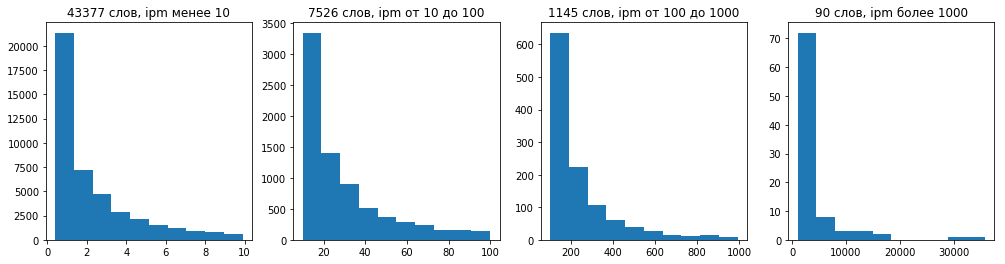

In [8]:
subsets = {
    1: {'name': 'ipm менее 10', 'subset': fr[fr['Freq(ipm)'] < 10]},
    2: {'name': 'ipm от 10 до 100', 'subset': fr[(fr['Freq(ipm)'] >= 10) & (fr['Freq(ipm)'] < 100)]},
    3: {'name': 'ipm от 100 до 1000', 'subset': fr[(fr['Freq(ipm)'] >= 100) & (fr['Freq(ipm)'] < 1000)]},
    4: {'name': 'ipm более 1000', 'subset': fr[fr['Freq(ipm)'] >= 1000]}
}
for i in range(1,5):
    subsets[i]['number of rows'] = len(subsets[i]['subset'])

fig = plt.figure(figsize=(17,4))
for i in range(1,5):
    fig.add_subplot(1,4,i)    
    plt.hist(subsets[i]['subset']['Freq(ipm)'])
    plt.title(str(subsets[i]['number of rows']) + ' слов, ' + str(subsets[i]['name']))
plt.show()

Теперь лучше. На первой гистограмме видно, что количество слов с частотой меньше единицы более 20 тысяч (это более трети частотного словаря), и затем, с увеличением частоты на единицу, резко снижается. С дальнейшим увеличением частоты уменьшение количества слов становится мене резким. Всего на первой гистограмме представлено более 43 тысяч слов, что составляет более 83% всего частотного словаря.

Похожую ситуацию можно увидеть и на остальных гистограммах. Сделав поправку на масштабы каждой из них, мы можем представить динамику снижения количества слов с увеличением их частоты.
### Выводы
Подавляющее большинство слов в частотном словаре попадают в диапазон частот от 0 до 1000. Более трети словаря составляют слова с частотой меньше единицы (что означает менее одного слова на миллион в текстах корпуса). Около 83% слов в частотном словаре встречаются не более десяти раз на миллион слов корпуса. Только 90 слов встречаются чаще, чем 1000 раз на миллион слов в корпусе.

Иными словами, гигантский пласт лексики используется редко или крайне редко, и только небольшая часть слов языка используется  более-менее часто.

## Не все части речи одинаково полезны
В предыдущем исследовании (см. "Исследование частотного словаря русского языка. Часть 1") я подсчитывала количество частей речи в частотном словаре. Тогда вышло, что больше всего в частотном словаре существительных (46.93%), глаголов (23.68%) и прилагательных (22.2%), а меньше всего - союзов (0.16%), числительных (0.18%) и предлогов (0.22%).

Теперь я хочу посмотреть не только на то, какой процент частотного словаря составляют разные части речи, но и насколько частотны они в текстах корпуса, то есть насколько интенсивно они используются в письменной речи.

Для начала я сопоставлю обозначения частей речи, которые используются в частотном словаре, их названиям - так же, как я это делала в предыдущем исследовании. Кроме того, я сразу объединю некоторые части речи, которые в частотном словаре фигурируют по отдельности (например, adv и advpro обозначу как наречие, хотя в частотном словаре advpro - это местоименное наречие).

Затем я применю созданный словарь к столбцу PoS и присоединю результирующий объект (Series с названиями частей речи на русском) к таблице с исходными данными.

In [9]:
posNames = {
's' : 'существительное',
'v' : 'глагол',
'a' : 'прилагательное',
'adv' : 'наречие',
'advpro' : 'наречие',
'spro' : 'местоимение',
'apro' : 'местоимение',
'num' : 'числительное',
'anum' : 'числительное',
'pr' : 'предлог',
'conj' : 'союз',
'part' : 'частица',
'intj' : 'междометие',
's.PROP' : 'существительное',
}

In [10]:
fr['Часть речи'] = fr['PoS'].replace(posNames)
fr['Часть речи'].iloc[0:5]

0           союз
1        предлог
2        частица
3        предлог
4    местоимение
Name: Часть речи, dtype: object

Осталось сгруппировать элементы и подсчитать их суммарные частоты. Для этого я использую сводную таблицу (Pivot Table). Результирующую таблицу я использую для создания новой, в которой значения будут выражены в процентах.

In [11]:
posFreq = fr.pivot_table(index="Часть речи", values="Freq(ipm)", aggfunc=np.sum)
posStat = pd.DataFrame({'% текстов корпуса': posFreq['Freq(ipm)']/10000})
posStat

,% текстов корпуса
Часть речи,
глагол,15.80436
междометие,0.09454
местоимение,11.54246
наречие,6.98276
предлог,10.94299
прилагательное,8.99839
союз,7.69896
существительное,28.53906
частица,3.97555


Теперь я просуммирую значения в таблице, чтобы понять, какую долю корпуса занимают слова, попавшие в частотный словарь. 

In [12]:
np.sum(posStat)

% текстов корпуса    95.56482
dtype: float64

Что же, более чем 95% от всего корпуса - это, по-моему, достаточно много, чтобы на основе полученной информации сделать выводы относительно долей частей речи во всем корпусе. Даже если распределение частей речи в оставшейся "за бортом" части корпуса иное, мы можем этим пренебречь, так как это не будет сильно влиять на общий результат для всего корпуса.

Теперь посчитаем, какой процент в частотном словаре составляют части речи. Я уже делала это в предыдущей части исследования, а теперь повторю, используя другой способ подсчета.

In [13]:
posCount = fr['Часть речи'].value_counts()
posCountPercent = (posCount/len(fr['Часть речи']))*100
posCountPercent

существительное    46.929303
глагол             23.675630
прилагательное     22.196862
наречие             5.677241
междометие          0.360582
частица             0.349074
местоимение         0.249338
предлог             0.222486
числительное        0.178373
союз                0.161111
Name: Часть речи, dtype: float64

Ццифры совпадают с результатами, полученными в предыдущем исследовании. Это хорошо.

Теперь я присоединю результат к имеющейся таблице с информацией о распределении частей речи в корпусе, чтобы можно было сравнить эти значения.

In [14]:
posStat['% частотного словаря'] = posCountPercent
posStat

,% текстов корпуса,% частотного словаря
Часть речи,,
глагол,15.80436,23.675630
междометие,0.09454,0.360582
местоимение,11.54246,0.249338
наречие,6.98276,5.677241
предлог,10.94299,0.222486
прилагательное,8.99839,22.196862
союз,7.69896,0.161111
существительное,28.53906,46.929303
частица,3.97555,0.349074


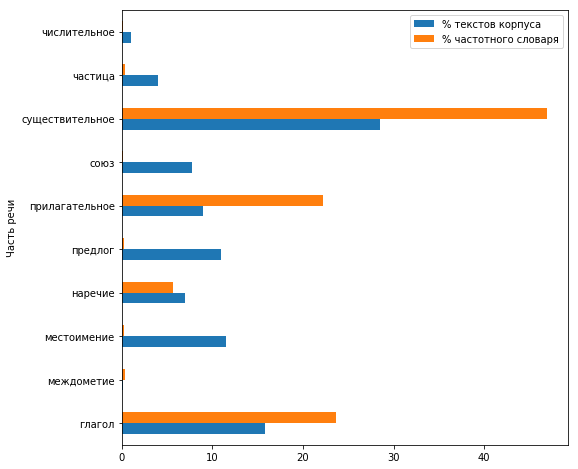

In [15]:
posStat.plot.barh(figsize = (8,8))
plt.show()

На диаграмме видно, что некоторые части речи, такие как союзы или предлоги, занимают крошечную часть частотного словаря, но при этом довольно часто используются в текстах. Другие (например, прилагательные и существительные) составляют значительную часть частотного словаря, но в текстах их доля заметно меньше. Назовем отношение частотности частей речи в текстак к их доле в частотном словаре *интенсивностью использования* и сравним этот показатель для разных частей речи.

In [16]:
intensity = posStat['% текстов корпуса']/posStat['% частотного словаря']
intensity

Часть речи
глагол              0.667537
междометие          0.262188
местоимение        46.292368
наречие             1.229957
предлог            49.184967
прилагательное      0.405390
союз               47.786711
существительное     0.608129
частица            11.388859
числительное        5.526348
dtype: float64

Итак, интенсивность использования частей речи варьирует в пределах от приблизительно 0,26 (междометия) до чуть более 49 (предлоги). Посмотрим, как это выглядит на диаграмме.

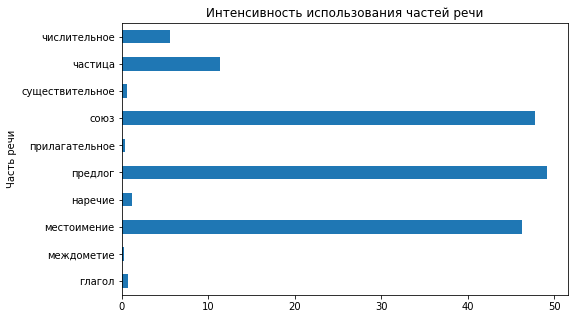

In [17]:
intensity.plot.barh(figsize = (8,5))
plt.title('Интенсивность использования частей речи')
plt.show()

### Выводы
Наиболее интенсивно используются в текстах:
- предлоги
- союзы
- местоимения

Наименее интенсивно используются:
- междометия
- прилагательные
- существительные

## Связь длины слова и его частоты
В первой части исследования я изучала длину слов в частотном словаре: сколько слов коротких, сколько длинных, и что это за слова. На этот раз я хочу посмотреть, есть ли какая-то связь между длиной слова и его частотой. Ведь мы уже выяснили, что самыми частотными словами являются служебные части речи, а они как раз самые короткие. Будут ли другие части речи чем короче, тем чаще встречаться в текстах?

Для начала посмотрим на распределение длины слов. В прошлый раз я составляла словарь "длина слова: количество слов этой длины" и отметила, что распределение слов по длине похоже на нормальное. На этот раз мы построим гистограмму, чтобы получить более наглядную картину распределения.

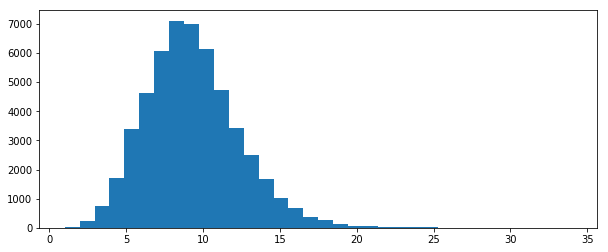

In [23]:
fig = plt.figure(figsize=(10,4))
plt.hist(fr['Lemma'].str.len(), bins=34);

Да, распределение похоже на нормальное. Большинство слов имеют длину 5 - 12 букв. Попробуем теперь посмотреть, есть ли связь между длиной слова и его частотой. Построим для этого диаграмму рассеяния.

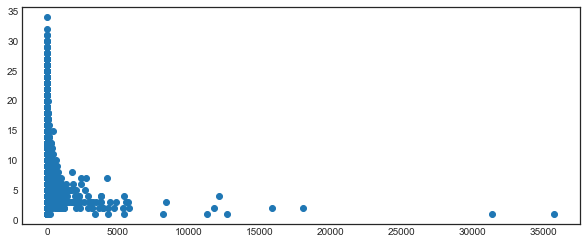

In [91]:
fig = plt.figure(figsize=(10,4))
plt.scatter(fr['Freq(ipm)'],fr['Lemma'].str.len());

Похоже, снова придется разбить диаграмму на четыре неравные части, чтобы масштабы величин были сопоставимы.

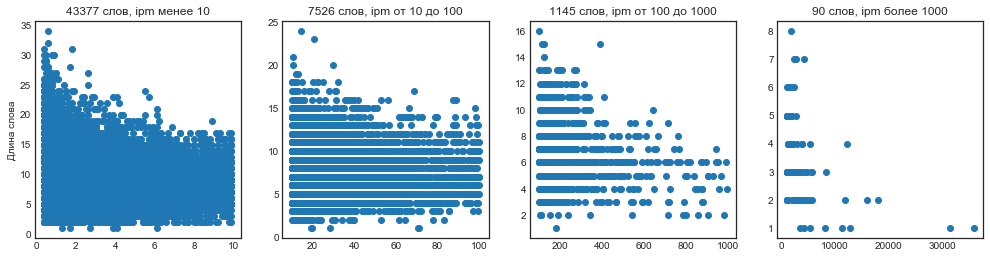

In [108]:
fig = plt.figure(figsize=(17,4))
for i in range(1,5):
    fig.add_subplot(1,4,i)    
    plt.scatter(subsets[i]['subset']['Freq(ipm)'],subsets[i]['subset']['Lemma'].str.len())
    plt.title(str(subsets[i]['number of rows']) + ' слов, ' + str(subsets[i]['name']))
    if i == 1:
        plt.ylabel('Длина слова')
plt.show()

Теперь лучше. На первой диаграмме мы видим, что самые длинные слова (от 25 до 35 букв) имеют ipm меньше 4. На второй диаграмме таких длинных слов нет, и далее, с увеличением масштаба диаграммы мы видим что-то похожее на тенденцию более коротких слов иметь более высокий ipm. Но все же надо понимать, что подавляющее большинство слов попали на первую диаграмму, и, просто глядя на нее, невозможно понять, как распределены данные. Нам понадобится какой-то показатель, который бы нам сказал, есть корреляция или нет. Поскольку мы уже видели, что частоты слов не распределены нормально, то нам понадобится критерий из ряда непараметрических. Возьмем коэффициент корреляции Спирмена.

In [29]:
from scipy.stats import spearmanr
spearmanr(fr['Freq(ipm)'],fr['Lemma'].str.len())

SpearmanrResult(correlation=-0.24131754299225519, pvalue=0.0)

Какая-то корреляция есть, но -0,24 - это довольно мало. Так что делаем вывод, что длина слова и его частота в масштабах всего частотного словаря связаны очень слабо. 

Но что если взять не весь словарь, а только самые частотные слова? Мне кажется, что-то из этого должно выйти. Почему я так думаю? А потому что язык так устроен. Любимый мною лингвист и преподаватель Дмитрий Петров говорит об этом примерно так (за точность не ручаюсь): "Некоторые слова так часто используются, что со временем становятся короче". И, как мне кажется, этот принцип должен реализоваться как раз на высокочастотных словах. Проверим.

In [107]:
for i in range(100,1100,100):    
    r, pval = spearmanr(fr.iloc[:i]['Freq(ipm)'],fr.iloc[:i]['Lemma'].str.len())
    print('Первые ' + str(i) + ' слов: ' + str(r))

Первые 100 слов: -0.515250199579
Первые 200 слов: -0.576580373651
Первые 300 слов: -0.521758148027
Первые 400 слов: -0.529072139595
Первые 500 слов: -0.471146766096
Первые 600 слов: -0.437616116048
Первые 700 слов: -0.412524835808
Первые 800 слов: -0.39744873639
Первые 900 слов: -0.367792229036
Первые 1000 слов: -0.357062822732


Вот так мне больше нравится. Похоже, корреляция между длиной слова и его частотой все-таки существует, хотя и не очень выраженная. Наиболее ярко она проявляется на первых 200 самых частотных словах русского языка, и далее с убыванием частотности слов также убывает.

## Законы жанра

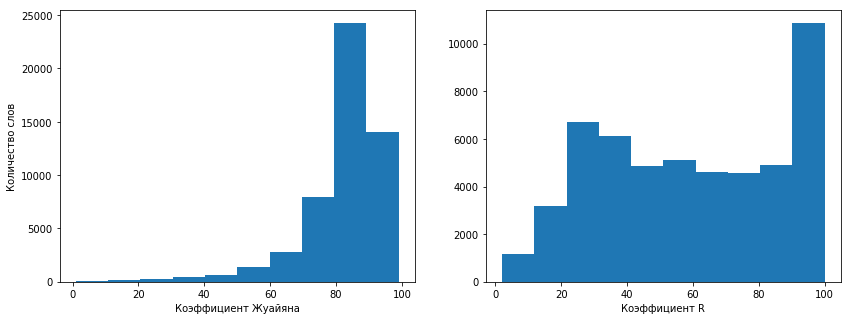

In [111]:
fig = plt.figure(figsize=(14,5))
fig.add_subplot(1,2,1)
plt.hist(fr['D'])
plt.xlabel('Коэффициент Жуайяна')
plt.ylabel('Количество слов')
fig.add_subplot(1,2,2)
plt.hist(fr['R'])
plt.xlabel('Коэффициент R')
plt.show()

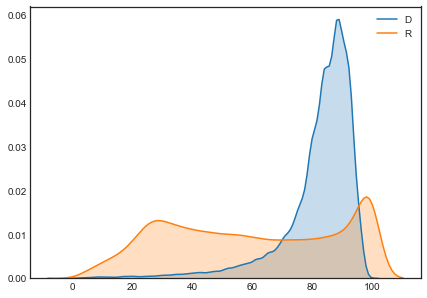

In [74]:
import seaborn as sns
fig = plt.figure(figsize=(7,5))
sns.kdeplot(fr['D'], shade = True)
sns.kdeplot(fr['R'], shade = True)
plt.show()

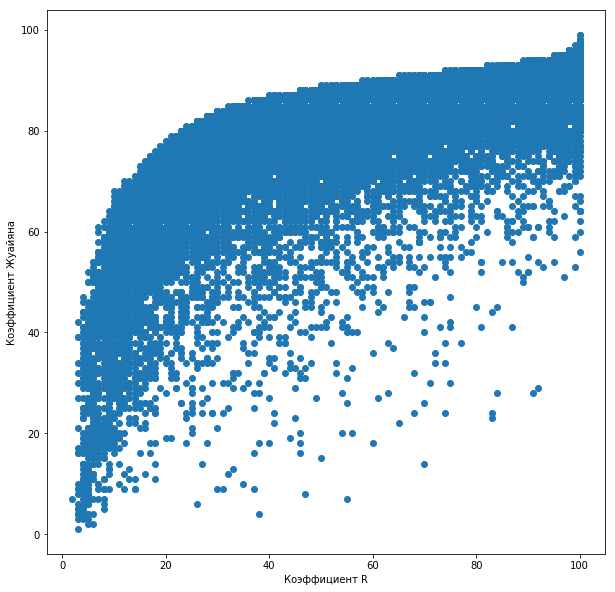

In [112]:
fig = plt.figure(figsize=(10,10))
plt.scatter(fr['R'],fr['D'])
plt.xlabel('Коэффициент R')
plt.ylabel('Коэффициент Жуайяна')
plt.show()

Можно заметить следующую тенденцию:
- На низких значениях R (менее 30) небольшое увеличение R дает значительное увеличение D.
- На значениях R выше 30, наоборот, значительное увеличение R дает незначительный прирост D.
Но опять мы не можем сказать, что это наблюдение стопроцентно верно, так как мы не видим плотность распределения значений в верхей части диаграммы, где их большинство. Почему большинство? Если судить по распределению коэффициента Жуайяна на предыдущей диаграмме, где подавляющее большинство слов имеют коэффициент Жуайяна выше 50, а именно они составляют верхнюю половину диаграммы рассеяния.

Попробуем посчитать корреляцию между коэффициентами. Я ожидаю, что корреляция должна быть заметная, поскольку оба коэффициента говорят об одном и том же признаке: специфичности или общеупотребимости слов. Данные в обоих случаях распределены нормально, так что мы можем использовать коэффициент корреляции Пирсона.

In [60]:
from scipy.stats import pearsonr
pearsonr(fr['R'],fr['D'])

(0.69262775242913177, 0.0)

Что же, 0.69 - это довольно неплохо, связь достаточно выраженная. Но нельзя ли увидеть еще более выраженную связь, если анализировать не весь частотный словарь, а отдельные его части? Это уже помогло мне раньше увидеть связь между длиной слова и частотой на высокочастотных словах. Попробую похожий подход еще раз: буду разбивать список на две части по коэффициенту R (больше или меньше определенного значения) и анализировать каждую часть отдельно. Я ожидаю увидеть более выраженную корреляцию отдельно для слов с коэффициентом R меньше 30 (или около того) и отдельно - больше 30. 

In [110]:
rows = []
for number in range(4,100):
    lowR = fr[fr['R'] < number]
    highR = fr[fr['R'] >= number]
    rLow, p_valueLow = pearsonr(lowR['R'],lowR['D'])
    rHigh, p_valueHigh = pearsonr(highR['R'],highR['D'])
    row = [number,rLow, rHigh]
    rows.append(row)    
pearsons = pd.DataFrame(rows, columns=['R','rLow','rHigh'])
pearsons

,R,rLow,rHigh
0,4,0.146179,0.693016
1,5,0.160922,0.693848
2,6,0.191736,0.694752
3,7,0.350908,0.694458
4,8,0.430594,0.693836
5,9,0.472386,0.693110
6,10,0.520015,0.691264
7,11,0.577064,0.688651
8,12,0.603104,0.685637
9,13,0.614766,0.682378


Итак, мы действительно получили максимальный коэффициент корреляции (около 0.775) на словах с R меньше 28, что близко к ожидаемому мной значению R=30. Но вот что касается остальной части слов (R больше или равно 28), то тут коэффициент корреляции меньше, чем подсчитанный на всем массиве данных (0.597 против 0.6926). И, как бы мы не разбивали данные, коэффициент корреляции, посчитанный на более общеупотребительных словах (R больше некоторого значения) всегда остается ниже, чем посчитанный на всех данных. Посмотрим, как это выглядит на диаграмме рассеяния. 

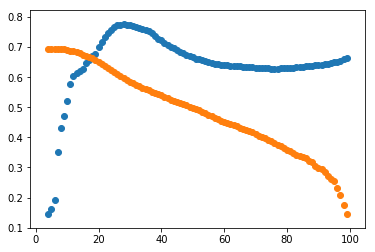

In [94]:
plt.scatter(pearsons['R'],pearsons['rLow'])
plt.scatter(pearsons['R'],pearsons['rHigh']);

Синяя кривая показывает изменение коэффициента корреляции по мере того, как мы добавляем более общеупотребительные слова к более специфичным. Максимального значения, как мы уже выяснили, корреляция достигает при выборке слов с R меньше 28, а при дальнейшем увеличении R плавно снижается, слегка увеличиваясь на значениях R от 80 до 100.

Оранжевая кривая показывает изменение коэффициента корреляции по мере того, как мы "выбрасываем" из частотного словаря более специфические слова и оставляем более общеупотребительные. В этом случае коэффициент корреляции неуклонно снижается.

О чем это может говорить? Наверное, о том, что наибольший вклад в корреляцию вносят слова с меньшим значением R. Видимо, более специфичные слова более однозначно идентифицируются обоими методами: и вычислением коэффициента Жуайяна, и вычислением R.